In [1]:
import sympy as sp # The library this tutorial is about
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For plotting

sp.init_printing() # For pretty printing

## Introduction

Sympy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python and does not require any external libraries. Here is the documentation: [SymPy Documentation](https://docs.sympy.org/latest/index.html). As with any Python library, we need to import it before we can use it. We can asign it an alias, such as `sp`, for convenience.

```python
import sympy as sp
```

Sympy relies on symbols. We can define a symbol like this:

In [2]:
x = sp.Symbol('x')

Our variable `x` is now a symbol, with the help of the `Symbol()` function. It took a string as an argument, and returned a symbol object. If we were to print `x`, we would see the string we passed to `Symbol()`. With Jupyter Notebook, we can also see the symbol object by simply typing the name of the symbol and running the cell. Doing this will also display the symbol in a nicely typeset format, using LaTeX.

In [3]:
x

We can do lots of things with symbols. For instance, we can perform basic operations of them:

In [4]:
x**2

In [5]:
sp.sin(x) + sp.cos(x)

Sympy has a multitude of functions for performing symbolic mathematics. This includes trigonometric functions, as shown above. We can use symbolic variables as arguments to these functions, and they can be used to create expressions and equations. These expressions may be saved to other variables:

In [6]:
y = x**2 + 8*x + 16

y

In the code above, we defined a new variable, `y`, and set it equal to a polynomial expression in terms of our symbol `x`. We can also do operations on these expressions:

In [7]:
z = y**3

z

Now we have a variable `z`. Note that you can use quite a few methods on expressions, that will return a different expression. For instance, `expand()` will expand the expression, and `factor()` will factor it. We can use these on our variables as shown below:

In [8]:
z.expand()

In [9]:
z.factor()

We can also use the `solve()` function to solve equations. This function takes two arguments: the equation to solve, and the variable to solve for. It returns a list of solutions. If there are no solutions, it returns an empty list. For a polynomial function, $f(x)$, we can use `solve(f(x), x)` to get all the values of $x$ such that $f(x) = 0$. Let's show this by solving our polynomial `y` for `x`:

In [10]:
sp.solve(y, x)

When we solve an expression, sympy assumes it to be an expression which equals 0. This is important to remember, especially when you are using sympy to solve problems. It is often simpler to write your equations as expressions, by moving all the terms to one side.

**Note:** It is good practice to give more information about a symbol when it is being defined. For instance, we may define `x` as a real number, or as an integer. This can be done by passing more keyword arguments into the `Symbol()` function when defining the symbol. These characteristics of the symbol are called assumptions, and can be used by sympy to get the answer you actually want. It may not matter much for simpler problems, but it will help you when dealing with more complex ones, such as in physics.

In [11]:
x = sp.Symbol('x')

sp.solve(x**2 + 1, x)

Above, sympy had solved the polynomial $x^2 + 1$ for $x$. This obviously gives us $i$, and $-i$. However, we may only be interested in real solutions. We can have sympy take this into account by defining our symbol `x` and specifying that it is a real number:

In [12]:
x = sp.Symbol('x', real=True)

sp.solve(x**2 + 1, x)

We know that the polynomial $x^2 + 1$ has no real solutions, so sympy returns an empty list. We may also define multiple symbols at once by passing a string of symbols to the `symbols()` function. Having a space between the characters in the string is important for sympy to recognize them as separate symbols. We could then create expressions with multiple symbols.

In [13]:
x, y, z = sp.symbols('x y z')

f = x**2 + 2*x*y + 4*z

We can do quite a few things with multivariable expressions. Just as we can solve an expression with a single variable, we may solve one with multiple variables, which will give us a variable in terms of the other ones.

In [14]:
sp.solve(f, x)

In [15]:
sp.solve(f, y)

As the `solve()` returns a list, we can use list indexing to get those values and assign them to new variables. Also, sympy lets us turn symbolic expressions into functions, which we can then use to evaluate the expression at a given value. This is done with the `lambdify()` function. It takes two arguments: the variables to turn into arguments of the function, and the expression to turn into a function. Let's see this in action:

In [16]:
expr = sp.solve(f, z)[0]

expr_f = sp.lambdify((x, y), expr)

We have create a numeric function that behaves just like any other function in Python. We are able to pass in values as arguments and it will return some value. Note that I will use an underscore and a lowercase f to indicate variables that are numeric functions.

In [17]:
expr_f(1, 3)

It took our expression, $\frac{x(-x-2y)}{4}$, and turned it into a function of $x$ and $y$. By passing in two arguments into our numeric function, Python evaluates the expression numerically. With the example above, passing 1 and 3 as arguments will give the answer to $\frac{1(-1-2(3))}{4} = -\frac{7}{2}$.

With the help of the numpy and matplotlib libraries, we can plot this numeric function. Before that, we can change some of the default values of matplotlib to make our plots look nicer.

In [18]:
plt.rcParams["axes.facecolor"] = "black"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["axes.titlecolor"] = "white"
plt.rcParams["figure.facecolor"] = "black"
plt.rcParams["legend.labelcolor"] = "white"
plt.rcParams["xtick.labelcolor"] = "white"
plt.rcParams["ytick.labelcolor"] = "white"
plt.rcParams["grid.color"] = "#707070"
plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"

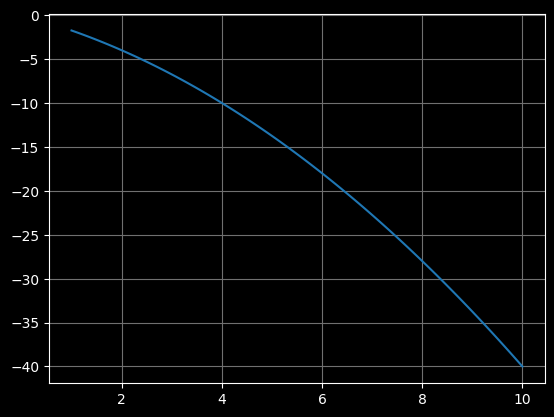

In [19]:
x_num = np.linspace(1, 10, 100) # Creates a linearly spaced array of 100 numbers between 1 and 10
y_num = 3

plt.plot(x_num, expr_f(x_num, y_num)) # Plots the function
plt.grid() # Adds a grid
plt.show() # Shows the plot

Another thing we can do is use the `subs()` method to substitute values into an expression. This is useful if we want to evaluate an expression at a specific value, or if we want to substitute a variable with another expression.

In [20]:
expr.subs({x: 5, y: 9})

In [21]:
expr.subs({x: sp.sin(x), y: sp.cos(x)}).simplify()

The `subs()` method evaluates it's arguments left to right. This is more important when you are substituting a variable with an expression. In the example above, we subsitute $sin(x)$ for $x$ first, and then $cos(x)$ for $y$. If we were to do it the other way around, we would get a different answer. Afterwards, we used the `simplify()` method to simplify the expression, making it look nicer.

## Physics Example

A block is place on a ramp which is inclined at an angle $30$° to the horizontal. The block has a mass $4kg$. The coefficient of kinetic friction between the block and the ramp is $0.3$. If the length of the ramp is $10m$, and the block is released from rest at the top of the ramp, how long does it take for the block to reach the bottom of the ramp?

We would have to derive an equation that describes the position of the block at some time $t$. We can do this by getting an expression for the acceleration of the block, and then integrating it twice to get the position. This is an example where we may use Netwon's second law, $F = ma$.

The forces acting on the block are gravity, friction, and the normal force. The force of gravity has a magnitude of $mg$, where $g$ is the acceleration due to gravity. We can set the $x$-axis to be the diagonal of the ramp and the $y$-axis to be perpendicular to the ramp. With a bit of geometry, we can find that the $x$ component of gravity is $mg\sin(\theta)$, and the $y$ component is $mg\cos(\theta)$. $\theta$ is the angle of the incline and $m$ is the mass of the block. We can put the $y$ component into Newton's second law, as we know that acceleration in the $y$ direction is 0. This gives us:

$$
\begin{align}
N& - mg\cos(\theta) = 0 \\
N& = mg\cos(\theta)
\end{align}
$$

Therefore, the normal force is the $y$ component of gravity. The other force acting on the block is friction, which is in the opposite direction of the block's motion. We can find the magnitude of the frictional force by multiplying the normal force by the coefficient of friction. The type of friction depends on whether the block is moving or not. If the block is not moving, then the frictional force is static friction, and if it is moving, then it is kinetic friction. As the block is released from rest, it will start moving, so we will use kinetic friction. We know that friction is proportional to the normal force, so we get:

$$
f_k = \mu_kN = \mu_kmg\cos(\theta)
$$

where $\mu_k$ is the coefficient of kinetic friction. Putting gravity and friction into Newton's second law, we get:

$$
\begin{align}
ma &= mg\sin(\theta) - \mu_kmg\cos(\theta) \\
a &= g\sin(\theta) - \mu_kg\cos(\theta)
\end{align}
$$

Integrating this twice will give us the position of the block at some time $t$. We can use sympy to do this for us.

In [22]:
# Create symbolic variables
m, g, mu_k, t, theta = sp.symbols('m g mu_k t, theta')
x = sp.Function('x')(t)

# Gravitational force
F_G_x = m*g*sp.sin(theta)
F_G_y = -m*g*sp.cos(theta)

# Normal force
F_N_y = -F_G_y

# Friction force
F_F_x = -mu_k*F_N_y

# Net force
F_net_x = F_G_x + F_F_x

# Newton's second law
accel = F_net_x/m

We have the acceleration of the block as the variable. Sympy has a function called `dsolve()` that let's us solve differential equations (i.e. equations with derivatives in them). We can pass in our differential equation and the function we want to solve for, $x(t)$. Our equation will be the second derivative of $x(t)$, which equals the acceleration of the block. We can make this an expression by substracting the acceleration from the second derivative of $x(t)$.

In [23]:
sol = sp.dsolve(x.diff(t, 2) - accel, x).rhs

sol

We have our position function. Note that we used `rhs` to get the right hand side of the equation returned by `dsolve`, as the left side was `x(t)` which we don't need. Our answer currently has two unknowns, $C_1$ and $C_2$ which were the constants of integration. We can see how $C_1$ is the value of $x(t)$ when $t = 0$, meaning that it is the initial position of the block. $C_2$ is the value of the first derivative of $x(t)$ when $t = 0$, which is the initial velocity of the block. We know that the block is released from rest at the top of the ramp, so $C_1 = 0$ and $C_2 = 0$. We can substitute these values into our expression.

In [24]:
sol = sol.subs({sp.Symbol('C1'): 0, sp.Symbol('C2'): 0})

sol

We can use the `Symbol` object to subsitute values, which means we didn't have to define $C_1$ and $C_2$ as symbols and assign them to variables. What we are left with is our position function. We can put the conditions were given in the problem for the angle, acceleration due to gravity, and coefficient of kinetic friction into our expression.

In [25]:
sol = sol.subs({m: 4, g: 9.81, mu_k: 0.2, theta: np.deg2rad(30)})

By setting it equal to the length of the ramp, we can solve for $t$. We can subtract the expression from the length to get it as an expression equal to 0, and then use `solve()`.

In [26]:
t_f = sp.solve(10 - sol, t)

t_f

We have been given two solutions, but one of them is negative. This is because we are solving a quadratic equation, and quadratics have two solutions. Since our block is moving down the ramp starting at $t=0$, we can ignore the negative solution.

In [27]:
t_f[1]

We have the answer to our problem. It takes approximately $2.5$ seconds for the block to reach the bottom of the ramp.

That was an easy example though. We could have easily integrated that by hand and solved the quadratic equation. However, Sympy can do more complicated problems which we will discuss afterwards.

## Calculus

Sympy  can do calculus for us. It has many functions that allows us to do things like take derivatives and integrals. We can also do things like find limits and series expansions.

In [28]:
x = sp.Symbol('x')

### Limits

$$
\lim_{x \to 0} \frac{\sin(x)}{x}
$$

In [29]:
sp.limit(sp.sin(x)/x, x, 0)

### Derivatives

$$
\frac{d}{dx} \bigg[ \frac{1+tan(x)}{1+sin(x)} \bigg]
$$

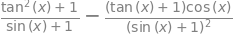

In [30]:
sp.diff((1+sp.tan(x))/(1+sp.sin(x)), x)

We can also take derivatives of abstract functions.

$$
\frac{d}{dx} \bigg[ f\bigg(\frac{x}{g(x)}\bigg) \bigg]
$$

In [31]:
f, g = sp.symbols('f g', cls=sp.Function)
g = g(x)
f = f(x/g)

f

In [32]:
dfdx = sp.Derivative(f, x)

dfdx

To actually evaluate the derivative, we can use the `doit()` method.

In [33]:
dfdx.doit()

⎛    d              ⎞                     
⎜  x⋅──(g(x))       ⎟                     
⎜    dx          1  ⎟ ⎛ d        ⎞│       
⎜- ────────── + ────⎟⋅⎜───(f(ξ₁))⎟│    x  
⎜     2         g(x)⎟ ⎝dξ₁       ⎠│ξ₁=────
⎝    g (x)          ⎠                 g(x)

where $\zeta_1$ is used by Sympy to represent the inner function.

### Indefinite Integrals

$$
\int csc^4(x) dx
$$

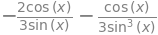

In [34]:
sp.integrate(sp.csc(x)**4, x)

**Note:** Sympy does not add the constant of integration when evaluating indefinite integrals. If you want the actual answer, you would have to add it yourself. Sympy does add it when solving differential equations though.

### Definite Integrals

$$
\int \limits_{0}^{\pi} \frac{1}{1+sin(x)} dx 
$$

In [35]:
sp.integrate(1/(1+sp.sin(x)), (x, 0, sp.pi))

We can even do integrals with variable limits.

$$
\int \limits_{a}^{b} e^{x^2} x^3 dx
$$

In [36]:
sp.integrate(sp.exp(x**2) * x**3, (x, sp.Symbol('a'), sp.Symbol('b')))

We may do improper integrals as well.

$$
\int \limits_{-\infty}^{\infty} e^{-x^2} dx
$$

In [37]:
sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo)) # sympy uses oo for infinity

### Series Expansions

$$
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1}
$$

In [38]:
# First 10 terms of the Taylor series of sin(x) around x = 0
sp.series(sp.sin(x), x, 0, 10)

The $O(x^{10})$ equals the higher order terms that are not included in the series expansion. If wanted to get 15 terms, we could have done `series(sin(x), x, 0, 15)` and our last term would have been $O(x^{15})$.

## Complex Example

To show off the power of Sympy, we will do a more complicated example. We will use the `sympy.physics.mechanics` module to do some mechanics problems. We will derive the equations of motion of a simple pendulum with a set of nonminimal coordinates. This system has one degree of freedom, meaning it can be described with one coordinate and one speed (the angle and angular velocity respectively). However, by choosing to describe the system in terms of the $x$ and $y$ coordinates of the mass, constraints are needed. The system is shown below:

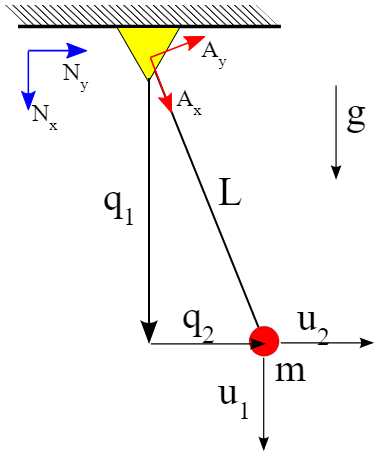

We will use Lagrange's method to get the EOM. First, we need to create the `dynamicsymbols` to describe the system. These will be the generalised coordinates $q_1$ and $q_2$, which are the $x$ and $y$ coordinates of the mass in the inertial $N$ frame. Thus, the time derivatives $\dot{q_1}$ and $\dot{q_2}$ are the velocities in these directions. We will also create symbols for time, gravity, the length and mass of the pendulum.

In [39]:
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, mechanics_printing, Point, Lagrangian, LagrangesMethod

q1, q2 = dynamicsymbols('q1:3') # The :3 means q1 and q2
q1_dot, q2_dot = dynamicsymbols('q1:3', level=1) # level=1 means the first derivative
ell, m, g, t = sp.symbols('ell m g t')

mechanics_printing()

Afterwards, we will create a world reference frame $N$ and its origin point $N$* The velocity of the origin is set to 0. A second coordinate frame $A$ is oriented such that its $x$-axis is along the pendulum (as shown in the diagram above).

In [40]:
# Create world frame
N = ReferenceFrame('N')
pN = Point('N*')
pN.set_vel(N, 0)

theta1 = sp.atan(q2/q1)

A = N.orientnew('A', 'axis', [theta1, N.z]) # Orients A relative to N by theta1 around the z axis

Locating the pendulum mass is then as easy as specifying its location in terms of its $x$ and $y$ coordinates in the world frame. A `Particle` object may then be created to represent the mass at this location

In [41]:
# Create point P, the pendulum mass
P = pN.locatenew('P1', q1*N.x + q2*N.y)
P.set_vel(N, P.pos_from(pN).dt(N)) # Sets the velocity of P relative to N
pP = Particle('P1', P, m) # Create a particle with mass m at point P

NameError: name 'Particle' is not defined

Since our system has more coordinates than degrees of freedom, we need to introduce some constraints. In this case, we only need one holonomic constraint: the distance from the origin to the mass is always length $\ell$ (the pendulum rod is rigid).

In [ ]:
# Holonomic constraint equation
f_c = sp.Matrix([q1**2 + q2**2 - ell**2]) # This can be derived from Pythagoras

The only force acting on the system is gravity, at point `P`.

In [ ]:
# Input the force resultant at P
R = m*g*N.x

With the problem setup, the Lagrangian can be calculated, and the equations of motion formed. Note that the call to `LagrangesMethod` includes the Lagrangian, the generalized coordinates, the constraints (specified by `hol_coneqs` or `nonhol_coneqs`), the list of (body, force) pairs, and the inertial frame

In [ ]:
Lag = Lagrangian(N, pP)
LM = LagrangesMethod(Lag, [q1, q2], hol_coneqs=f_c, forcelist=[(P, R)], frame=N)
lag_eqs = LM.form_lagranges_equations()

Now, we may compose the operating point dictionary, set in the hanging at rest position:

In [ ]:
# Compose operating point
op_point = {q1: ell, q2: 0, q1_dot: 0, q2_dot: 0, q1_dot.diff(t): 0, q2_dot.diff(t): 0}

As there are constraints in the formulation, there will be corresponding Lagrange Multipliers. These may appear inside the linearized form as well, and thus should also be included inside the operating point dictionary. Fortunately, the `LagrangesMethod` class provides an easy way of solving for the multipliers at a given operating point using the `solve_multipliers` method.

In [ ]:
# Solve for multipliers at operating point
lam_op = LM.solve_multipliers(op_point=op_point)

With this solution, linearization can be completed. The `LagrangesMethod.linearize` method also requires the partitioning of the generalized coordinates and their time derivatives into independent and dependent vectors.

In [ ]:
op_point.update(lam_op)
# Perform the Linearization
A, B, inp_vec = LM.linearize([q2], [q2_dot], [q1], [q1_dot],
                            op_point=op_point, A_and_B=True)

In [ ]:
A

⎡ 0   1⎤
⎢      ⎥
⎢-g    ⎥
⎢───  0⎥
⎣ell   ⎦

In [ ]:
B

[]

The resulting matrix has dimensions 2 x 2, while the number of total states is `2*len(q) = 4`. This is because for constrained systems the resulting `A_and_B` form has a partitioned state vector only containing the independent coordinates and their derivatives. Written out mathematically, the system linearized about this point would be written as:

$$
\begin{bmatrix}
\dot{q_1} \\
\dot{q_2}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
- \frac{g}{\ell} & 0
\end{bmatrix}
\begin{bmatrix}
q_1 \\
q_2
\end{bmatrix}
$$

The purpose of linearization is to find the linearized equations of motion. This is done by finding the eigenvalues and eigenvectors of the matrix. The eigenvalues are the natural frequencies of the system, and the eigenvectors are the mode shapes. The eigenvectors are the coordinates that the system will oscillate in. The eigenvalues are the frequencies of the oscillations.

If we want to find the position function from our linearized equations of motion, we can use the `sympy.physics.mechanics.functions.ode_function` function. This function takes in the state vector, the time variable, the eigenvalues, and the eigenvectors. It returns the position function.

In [ ]:
sp.dsolve(sp.diff(q2_dot, t)-q2 * A[1, 0], q2)

In [ ]:
sp.dsolve(sp.diff(q1_dot, t)-q1 * A[0, 0], q1)

In [ ]:
eig = A.eigenvals()

eig

That shows a more complicated problem that Sympy can solve. Sympy has many modules that allow it to solve many different types of problems, ranging from math to physics to statistics. It is a very powerful tool that can be used to solve many problems. Another thing we will go over is multivariable calculus with Sympy.

## Multivariable Calculus

In [ ]:
x, y, z, u1, u2, u3, v1, v2, v3, t = sp.symbols('x y z u1 u2 u3 v1 v2 v3 t')

### Vectors and Geometry

In [ ]:
u = sp.Matrix([u1, u2, u3])
v = sp.Matrix([v1, v2, v3])

u, v

⎛⎡u₁⎤  ⎡v₁⎤⎞
⎜⎢  ⎥  ⎢  ⎥⎟
⎜⎢u₂⎥, ⎢v₂⎥⎟
⎜⎢  ⎥  ⎢  ⎥⎟
⎝⎣u₃⎦  ⎣v₃⎦⎠

In [ ]:
2*u + 3*v

⎡2⋅u₁ + 3⋅v₁⎤
⎢           ⎥
⎢2⋅u₂ + 3⋅v₂⎥
⎢           ⎥
⎣2⋅u₃ + 3⋅v₃⎦

In [ ]:
# Dot product
u.dot(v)

In [ ]:
# Cross product
u.cross(v)

⎡u₂⋅v₃ - u₃⋅v₂ ⎤
⎢              ⎥
⎢-u₁⋅v₃ + u₃⋅v₁⎥
⎢              ⎥
⎣u₁⋅v₂ - u₂⋅v₁ ⎦

In [ ]:
# Norm
u.norm()

In [ ]:
# Projection of u onto v
u.project(v)

⎡v₁⋅(u₁⋅v₁ + u₂⋅v₂ + u₃⋅v₃)⎤
⎢──────────────────────────⎥
⎢       2     2     2      ⎥
⎢     v₁  + v₂  + v₃       ⎥
⎢                          ⎥
⎢v₂⋅(u₁⋅v₁ + u₂⋅v₂ + u₃⋅v₃)⎥
⎢──────────────────────────⎥
⎢       2     2     2      ⎥
⎢     v₁  + v₂  + v₃       ⎥
⎢                          ⎥
⎢v₃⋅(u₁⋅v₁ + u₂⋅v₂ + u₃⋅v₃)⎥
⎢──────────────────────────⎥
⎢       2     2     2      ⎥
⎣     v₁  + v₂  + v₃       ⎦

Lines: $\vec r = \vec r_0 + t \vec v$

In [ ]:
r0 = sp.Matrix([x, y, z])
v = sp.Matrix([u1, u2, u3])
r = r0 + v*t

r

⎡t⋅u₁ + z⎤
⎢        ⎥
⎢t⋅u₂ + y⎥
⎢        ⎥
⎣t⋅u₃ + z⎦

Planes: $\vec n \cdot (P_0 - \langle x, y, z \rangle) = 0$

In [ ]:
P0 = sp.Matrix([1, 2, 3])
r0 = sp.Matrix([x, y, z])
n = sp.Matrix([u1, u2, u3])

n.dot(P0 - r0)

### Vector Calculus

#### Vector Derivatives

In [ ]:
r = sp.Matrix([4*t, sp.exp(t), sp.cos(t)**2])

r

⎡  4⋅t  ⎤
⎢       ⎥
⎢   t   ⎥
⎢  ℯ    ⎥
⎢       ⎥
⎢   2   ⎥
⎣cos (t)⎦

In [ ]:
sp.diff(r, t)

⎡       4        ⎤
⎢                ⎥
⎢        t       ⎥
⎢       ℯ        ⎥
⎢                ⎥
⎣-2⋅sin(t)⋅cos(t)⎦

**Example:** Find the gradient of $f(x, y, z) = x^2 y z^3$

In [ ]:
f

In [ ]:
f = x**2 + y + z**3

# Gradient of f
sp.Matrix([sp.diff(f, x), sp.diff(f, y), sp.diff(f, z)])

⎡2⋅x ⎤
⎢    ⎥
⎢ 1  ⎥
⎢    ⎥
⎢   2⎥
⎣3⋅z ⎦

**Example:** Find the angle between the velocity and acceleration of the vector $\vec r$ as a function of time $\theta (t)$

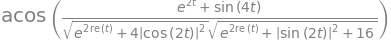

In [ ]:
v = sp.diff(r, t)
a = sp.diff(v, t)
theta = sp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()

theta

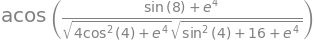

In [ ]:
theta.subs({t: 2})

In [ ]:
theta.subs({t: 2}).evalf()

#### Vector Integrals

**Note:** Sympy does not add the constant of integration when evaluating indefinite integrals.

In [ ]:
r = sp.Matrix([sp.cos(t)*sp.ln(x), sp.sin(t), t**-(1/4)])

r

⎡log(x)⋅cos(t)⎤
⎢             ⎥
⎢   sin(t)    ⎥
⎢             ⎥
⎢    -0.25    ⎥
⎣   t         ⎦

In [ ]:
sp.integrate(r, t)

⎡    log(x)⋅sin(t)     ⎤
⎢                      ⎥
⎢       -cos(t)        ⎥
⎢                      ⎥
⎢                  0.75⎥
⎣1.33333333333333⋅t    ⎦

In some cases, integrals cannot be solved analytically. For instance:
    
$$
\int e^{sin(x)} dx
$$

In [ ]:
sp.integrate(sp.exp(sp.sin(x)), x)

Sympy will just return the integral as is. Instead, we need to use numerical integration, which may be done with SciPy.

In [ ]:
from scipy.integrate import quad_vec

# vector of integrals that cannot be solved analytically
r = sp.Matrix([sp.exp(sp.sin(x)), sp.sqrt(1-x**4), sp.sin(x)/x])

r

⎡   sin(x)  ⎤
⎢  ℯ        ⎥
⎢           ⎥
⎢   ________⎥
⎢  ╱      4 ⎥
⎢╲╱  1 - x  ⎥
⎢           ⎥
⎢  sin(x)   ⎥
⎢  ──────   ⎥
⎣    x      ⎦

In [ ]:
r_f = sp.lambdify(x, r, 'numpy')

quad_vec(r_f, -1, 1)[0]

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in scalar divide
  return array([[exp(sin(x))], [sqrt(1 - x**4)], [sin(x)/x]])


array([[2.28319452],
       [1.74805754],
       [       nan]])

nan is returned by SciPy when the integral is undefined.

#### Partial Derivatives

In [ ]:
x, y, z = sp.symbols('x y z')

Partial derivatives $\frac{\partial f}{\partial x}$ of $f(x, y) = x^2 y + sin(x y)$

In [ ]:
f = x**2 * y + sp.sin(x*y) 

f

In [ ]:
sp.diff(f, x)

In [ ]:
sp.diff(f, y)

We can take partial derivatives of higher order as well: $\frac{\partial^2 f}{\partial x \partial y}$

In [ ]:
sp.diff(f, x, y)

In [ ]:
t = sp.symbols('t')
x, y, z, w, u = sp.symbols('x y z w u', cls=sp.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$
* $w$ is a function of $x$, $y$, and $z$, $ w(x, y, z)$

Find $\frac{dw}{dt}$

In [ ]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

We can leave them as abstract functions.

In [ ]:
sp.diff(w, t)

Or we may substitute in actual functions.

In [ ]:
w1 = 3*x**2*sp.ln(x) + sp.sin(y) + sp.exp(z**2)

w1

In [ ]:
sp.diff(w1, t).subs({x: sp.sin(t), y: sp.cos(t), z: t}).simplify()

#### Multiple Integrals

In some cases, we can do multiple integrals analytically. For instance:

$$
\int \int e^{x y} dx dy
$$

In [ ]:
x, y = sp.symbols('x y')
f = sp.exp(x * y)
sp.integrate(f, x, y)